# Week 9 handin


### Import the data into a Pandas dataframe. 


In [45]:
%matplotlib inline
%matplotlib notebook
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

url = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'

pd.set_option('display.max_rows', None)

data = pd.read_csv(url)

dfold = data[['Engine Information.Engine Statistics.Horsepower', 'Fuel Information.Highway mpg', 'Identification.Make',
              'Fuel Information.Fuel Type']]
dfold.columns = ['bhp','mpg','make','fuel']

df = dfold.loc[(dfold['make'] == 'BMW') & (dfold['fuel'] == 'Gasoline')].reset_index(drop=True)

dfnew = df[['bhp', 'mpg']]
#print(dfnew)

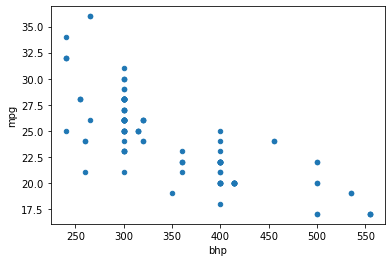

In [20]:

dfnew.plot.scatter(x = 0, y = 1)

          bhp       mpg
bhp  1.000000 -0.979335
mpg -0.979335  1.000000


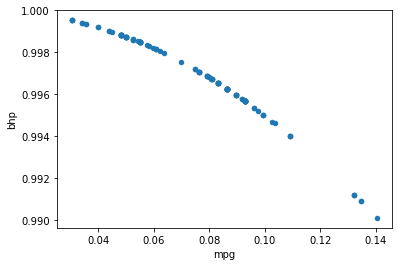

In [41]:
c = dfnew.columns
d = preprocessing.normalize(dfnew)

normalized_df = pd.DataFrame(d, columns=c)
print(normalized_df.corr(method='pearson', min_periods=1))

normalized_df.plot.scatter(x = 1, y = 0)
plt.show()

In [32]:
xs = dfnew['bhp']
ys = dfnew['mpg']

xs_reshape = np.array(xs).reshape(-1, 1)
#print(xs.shape)
#print(xs_reshape.shape)
#print(xs_reshape)

model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
#print(model.coef_)


NameError: name 'model' is not defined

### Perform linear regression where x = horsepower and y = mpg

In [8]:
z_scores = stats.zscore(dfnew)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_niear = dfnew[filtered_entries]


print(df_niear.columns)
print(df_niear.info())
print('--------------')


scaler = preprocessing.MinMaxScaler()
cars = df_niear.columns
d = scaler.fit_transform(df_niear)
scaled_df = pd.DataFrame(d, columns=cars)
print(scaled_df.head())
print(scaled_df.tail())
#print(df2)
print(scaled_df)

Index(['bhp', 'mpg'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   bhp     132 non-null    int64
 1   mpg     132 non-null    int64
dtypes: int64(2)
memory usage: 3.1 KB
None
--------------
        bhp       mpg
0  1.000000  0.000000
1  1.000000  0.000000
2  1.000000  0.000000
3  1.000000  0.000000
4  0.190476  0.473684
          bhp       mpg
127  0.507937  0.263158
128  0.507937  0.315789
129  0.507937  0.157895
130  0.238095  0.421053
131  0.238095  0.421053
          bhp       mpg
0    1.000000  0.000000
1    1.000000  0.000000
2    1.000000  0.000000
3    1.000000  0.000000
4    0.190476  0.473684
5    0.190476  0.473684
6    0.190476  0.578947
7    0.190476  0.473684
8    0.190476  0.473684
9    0.190476  0.578947
10   0.253968  0.473684
11   0.190476  0.578947
12   0.190476  0.421053
13   0.190476  0.473684
14   0.190476  0.473684


In [24]:
model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(model.coef_)
print(model.intercept_)

[-0.04043841]
38.37520693721943


In [46]:
predicted = model.predict(xs_reshape)
